## Project : Bike Sharing Dataset

In [1]:
# Import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### Data Wrangling
#### Gathering Data

In [2]:
day_df = pd.read_csv("C:/Users/DzulF/Bike-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("C:/Users/DzulF/Bike-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Assesing Data
##### `Day_df`

In [4]:
# informasi dasar struktur dan typedata pada csv

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Melihat 'data_df' apakah ada yang missing value

day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Mengecek apakah data 'day_df' ada yang duplikat

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Menampilkan statistik deskriptif tentang dataset, mulai dari nilai terendah, rata-rata, tertinggi dan sebagainya

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### `Hour_df`
Melakukan hal yang sama dengan sebelumnya 

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Melihat 'hour_df' apakah ada yang missing value

hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Mengecek apakah data 'hour_df' ada yang duplikat

print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat ditemukan dari info typedata (day_df dan hour_df)<br>Bahwa dari masing-masing khususnya `dteday` dikatakan mempunyai typedata object yang seharusnya datetime sesuai dengan format penanggalan. Sehingga harus dibetulkan 

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
# Mengecek kembali apakah sudah berubah

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Exploratory Data Analysis (EDA) & Data Visualization

Pertanyaan yang diajukan :
1.  Bulan apa dengan jumlah sepeda yang paling banyak dipinjam (cnt) dalam dataset? 
2.  Apakah musim (season) mempengaruhi rata-rata penggunaan sepeda?

`Jawaban No.1`
<br>data yang digunakan `mnth`, dan `cnt`

`- Day_df`

In [15]:
day_df.groupby('mnth')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
1,62.0,2176.338710,1161.674370,431.0,1251.75,1939.0,3235.75,4521.0
2,57.0,2655.298246,1145.313307,1005.0,1623.00,2402.0,3777.00,5062.0
3,62.0,3692.258065,1899.301812,605.0,2077.00,3216.5,5361.00,8362.0
4,60.0,4484.900000,1776.160778,795.0,3188.25,4293.5,6205.25,7460.0
5,62.0,5349.774194,1298.711561,2633.0,4409.00,4890.5,6405.50,8294.0
6,60.0,5772.366667,1240.400031,3767.0,4834.50,5308.5,6983.00,8120.0
7,62.0,5563.677419,1273.751871,3285.0,4491.50,5446.5,6678.75,8173.0
8,62.0,5664.419355,1494.516146,1115.0,4582.50,5229.5,7121.00,7865.0
9,60.0,5766.516667,1810.130649,1842.0,4532.00,5384.0,7509.25,8714.0


In [16]:
# Membuat nama baru sehingga nantinya akan lebih cepat untuk dipanggil 

monthly_avg = day_df.groupby('mnth')['cnt'].mean()

bulan_terbanyak = monthly_avg.idxmax()
jumlah_terbanyak = monthly_avg.max()

print("Bulan dengan Jumlah Peminjaman Sepeda Terbanyak (cnt):", bulan_terbanyak)
print("Jumlah Peminjaman Terbanyak (cnt) pada Bulan Tersebut:", jumlah_terbanyak)

Bulan dengan Jumlah Peminjaman Sepeda Terbanyak (cnt): 6
Jumlah Peminjaman Terbanyak (cnt) pada Bulan Tersebut: 5772.366666666667


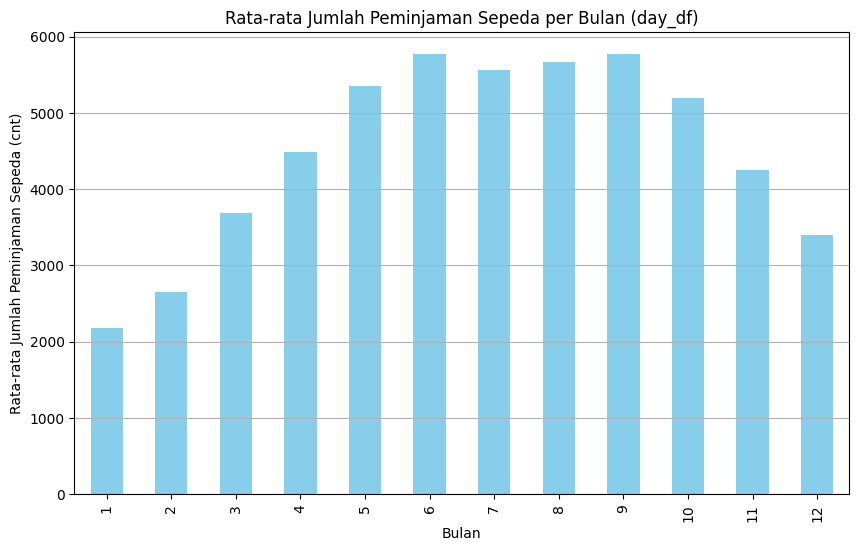

In [17]:
monthly_avg = day_df.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Bulan (day_df)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda (cnt)')
plt.grid(axis='y')
plt.show()

`- Hour_df`

In [18]:
# Analisis Bulan

# Statistik deskriptif
hour_df.groupby('mnth')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
1,1429.0,94.424773,99.907146,1.0,21.00,66.0,128.00,559.0
2,1341.0,112.865026,112.486565,1.0,28.00,82.0,164.00,610.0
3,1473.0,155.410726,163.543050,1.0,30.00,104.0,224.00,957.0
4,1437.0,187.260960,181.137902,1.0,36.00,136.0,282.00,822.0
5,1488.0,222.907258,187.721497,1.0,59.00,188.5,332.25,873.0
6,1440.0,240.515278,196.038950,1.0,73.75,203.0,362.00,900.0
7,1488.0,231.819892,187.483806,1.0,77.50,202.0,338.25,913.0
8,1475.0,238.097627,200.444648,1.0,65.50,204.0,343.00,941.0
9,1437.0,240.773138,214.609531,1.0,60.00,190.0,355.00,977.0


In [19]:
# Hitung rata-rata jumlah peminjaman per bulan

monthly_avg = hour_df.groupby('mnth')['cnt'].mean()

# Temukan bulan dengan jumlah terbanyak
bulan_terbanyak = monthly_avg.idxmax()
jumlah_terbanyak = monthly_avg.max()

print("Bulan dengan Jumlah Peminjaman Sepeda Terbanyak (cnt):", bulan_terbanyak)
print("Jumlah Peminjaman Terbanyak (cnt) pada Bulan Tersebut:", jumlah_terbanyak)

Bulan dengan Jumlah Peminjaman Sepeda Terbanyak (cnt): 9
Jumlah Peminjaman Terbanyak (cnt) pada Bulan Tersebut: 240.7731384829506


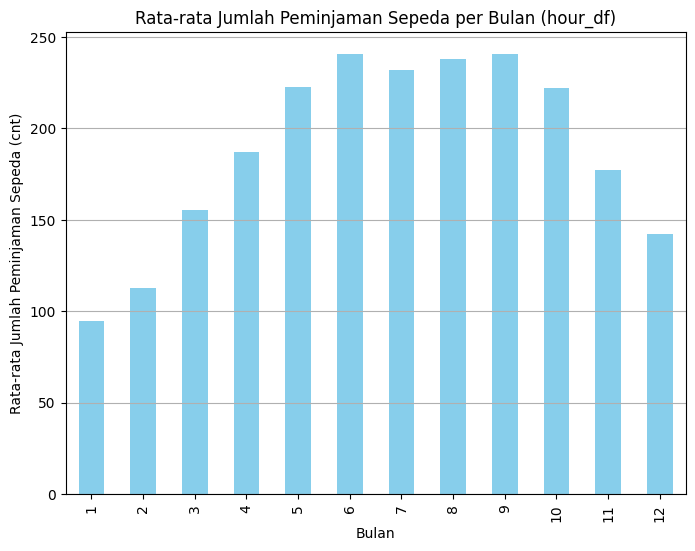

In [20]:
# Plot bar untuk rata-rata jumlah peminjaman per bulan

monthly_avg = hour_df.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(8, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Bulan (hour_df)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda (cnt)')
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

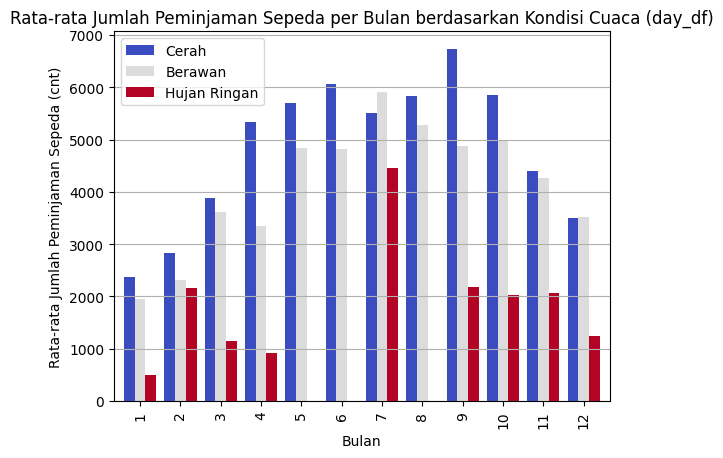

In [21]:
monthly_weather_avg = day_df.groupby(['mnth', 'weathersit'])['cnt'].mean().unstack()

# Plot bar diagram untuk rata-rata jumlah peminjaman per bulan berdasarkan kondisi cuaca
plt.figure(figsize=(12, 6))
monthly_weather_avg.plot(kind='bar', width=0.8, cmap='coolwarm')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Bulan berdasarkan Kondisi Cuaca (day_df)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda (cnt)')
plt.legend(['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'], loc='upper left')
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

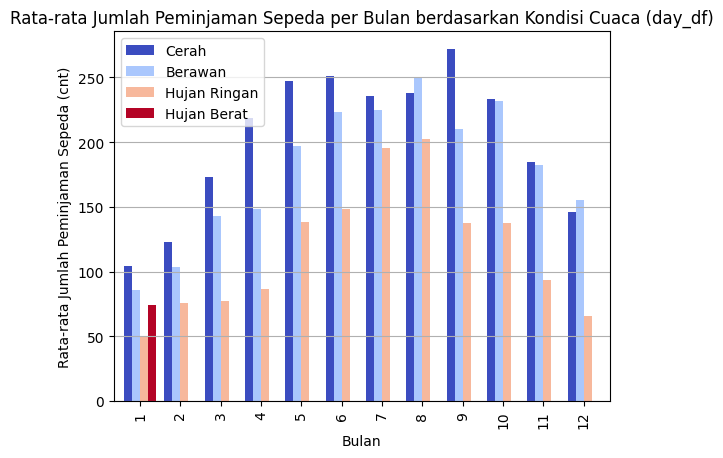

In [22]:
monthly_weather_avg = hour_df.groupby(['mnth', 'weathersit'])['cnt'].mean().unstack()

# Plot bar diagram untuk rata-rata jumlah peminjaman per bulan berdasarkan kondisi cuaca

plt.figure(figsize=(12, 6))
monthly_weather_avg.plot(kind='bar', width=0.8, cmap='coolwarm')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Bulan berdasarkan Kondisi Cuaca (day_df)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda (cnt)')
plt.legend(['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'], loc='upper left')
plt.grid(axis='y')
plt.show()

#### Kesimpulan :

Dikatan bahwa bulan dengan jumlah sepeda yang paling banyak dipinjam (cnt) dalam dataset day_df adalah bulan Juni (mnth 6) dengan rata-rata jumlah peminjaman yang tinggi. Sedangkan dalam dataset hour_df adalah bulan September (mnth 9) dengan rata-rata jumlah peminjaman yang tinggi. Hal ini berbeda karena dipengaruhi faktor cuaca 

`Jawaban No.2`<br>data yang digunakan hanya `day_df`

In [23]:
day_stats = day_df.groupby('season')['cnt'].describe()
print(day_stats)

        count         mean          std     min     25%     50%      75%  \
season                                                                     
1       181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
2       184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
3       188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
4       178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
1       7836.0  
2       8362.0  
3       8714.0  
4       8555.0  


In [24]:
day_avg = day_df.groupby('season')['cnt'].mean()
print(day_avg)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


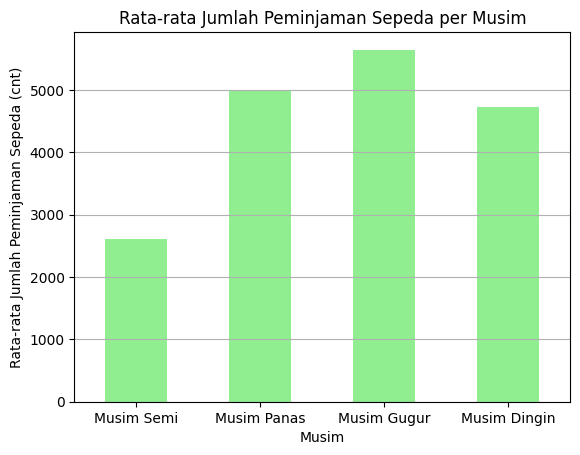

In [25]:
day_avg.plot(kind='bar', color='lightgreen')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda (cnt)')
plt.xticks(range(4), ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'], rotation=0)
plt.grid(axis='y')
plt.show()

C:\Users\DzulF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


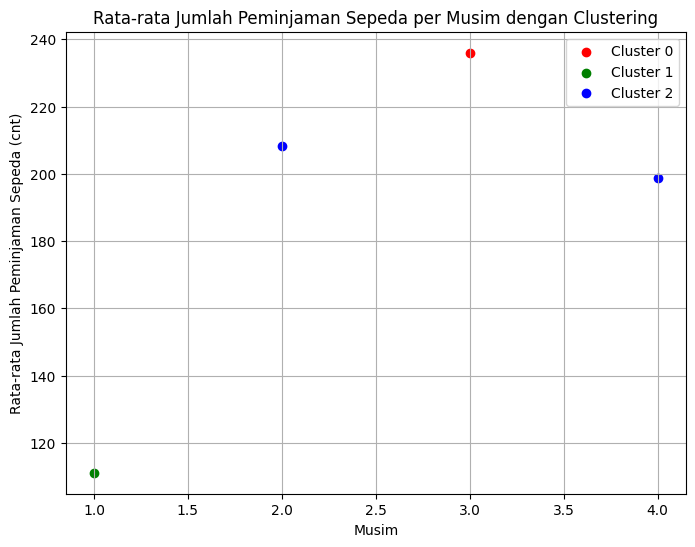

In [26]:
# Agar lebih mudah diberi nama "seasonal_avg"
seasonal_avg = hour_df.groupby('season')['cnt'].mean().reset_index()

# K-means Clustering berdasarkan rata-rata jumlah peminjaman per musim
kmeans = KMeans(n_clusters=3, random_state=0)                          # Misalnya, akan dikelompokan musim menjadi 3 kelompok
seasonal_avg['cluster'] = kmeans.fit_predict(seasonal_avg[['cnt']])

# Buat scatter plot dengan warna berdasarkan kelompok musim
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for cluster in range(3):
    data = seasonal_avg[seasonal_avg['cluster'] == cluster]
    plt.scatter(data['season'], data['cnt'], c=colors[cluster], label=f'Cluster {cluster}')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim dengan Clustering')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda (cnt)')
plt.legend()
plt.grid()
plt.show()

#### Kesimpulan :
Hasil menunjukkan bahwa musim atau season, mempengaruhi rata-rata penjumlah pengendara atau pinjaman per musim mungkin dipengaruhi oleh <i>event</i> atau lain sebagainya tetapi pada musim ke-2 hingga ke-4, ada peningkatan yang signifikan jika ada yang mengalami penurunan tidak ada penurunan yang signifikan. 

In [27]:
merged_df = pd.merge(day_df, hour_df, on='dteday', how='inner')
merged_df.to_csv('dataset_gabungan.csv', index=False)